In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
# Carregando os dados
dataset = pd.read_csv("./auto-mpg.csv")

In [5]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'Autonomia x Peso')

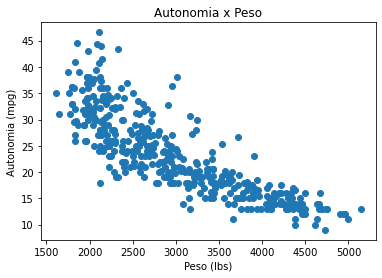

In [6]:
plt.scatter(dataset['weight'], dataset['mpg'])
plt.xlabel('Peso (lbs)')
plt.ylabel('Autonomia (mpg)')
plt.title('Autonomia x Peso')

In [12]:
# Pre processamento
X = dataset[['weight']]
Y = dataset[['mpg']]

In [ ]:
# transformar libras em kg e milhas por galão
X['weight'] = X['weight'] * 0.453592
Y['mpg'] = Y['mpg'] * 0.425144

In [16]:
X

,weight
0,720.932941
1,759.818879
2,706.942234
3,706.324997
4,709.616928
...,...
393,574.030510
394,438.238346
395,472.186387
396,540.082469


In [19]:
# Normalização
escala = StandardScaler()
escala.fit(X)
X_norm = escala.transform(X)

In [20]:
# Divisão dos dados em treino e teste
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3)

In [23]:
# Treinamento
rna = MLPRegressor(hidden_layer_sizes=(10, 5), 
                   max_iter=2000, tol=0.00001, 
                   learning_rate_init=0.1, 
                   solver='sgd', 
                   activation='logistic',
                   learning_rate='constant', verbose=2)

In [ ]:
rna.fit(X_norm_train, Y_train)

In [25]:
regliner = SGDRegressor(max_iter=2000, tol=0.00001, learning_rate='constant', eta0=0.1, verbose=2)

In [26]:
regliner.fit(X_norm_train, Y_train)

-- Epoch 1
Norm: 1.40, NNZs: 1, Bias: 4.388414, T: 278, Avg. loss: 0.509358
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 1, Bias: 4.302705, T: 556, Avg. loss: 0.328083
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.97, NNZs: 1, Bias: 3.947150, T: 834, Avg. loss: 0.329149
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 1, Bias: 4.247167, T: 1112, Avg. loss: 0.320544
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.32, NNZs: 1, Bias: 4.659051, T: 1390, Avg. loss: 0.328809
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.31, NNZs: 1, Bias: 4.505809, T: 1668, Avg. loss: 0.324447
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 4.183444, T: 1946, Avg. loss: 0.321200
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.07, NNZs: 1, Bias: 4.111414, T: 2224, Avg. loss: 0.308499
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.26, NNZs: 1, Bias: 4.388646, T: 2502, Avg. loss: 0.330714
Total training time: 0.00 seco

c:\Users\lucas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=2000, tol=1e-05,
             verbose=2)

In [ ]:
# Pos processamento
